In [15]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

Load the MNIST dataset

In [16]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [4 2 5 6 6 1 9 4 9 6]


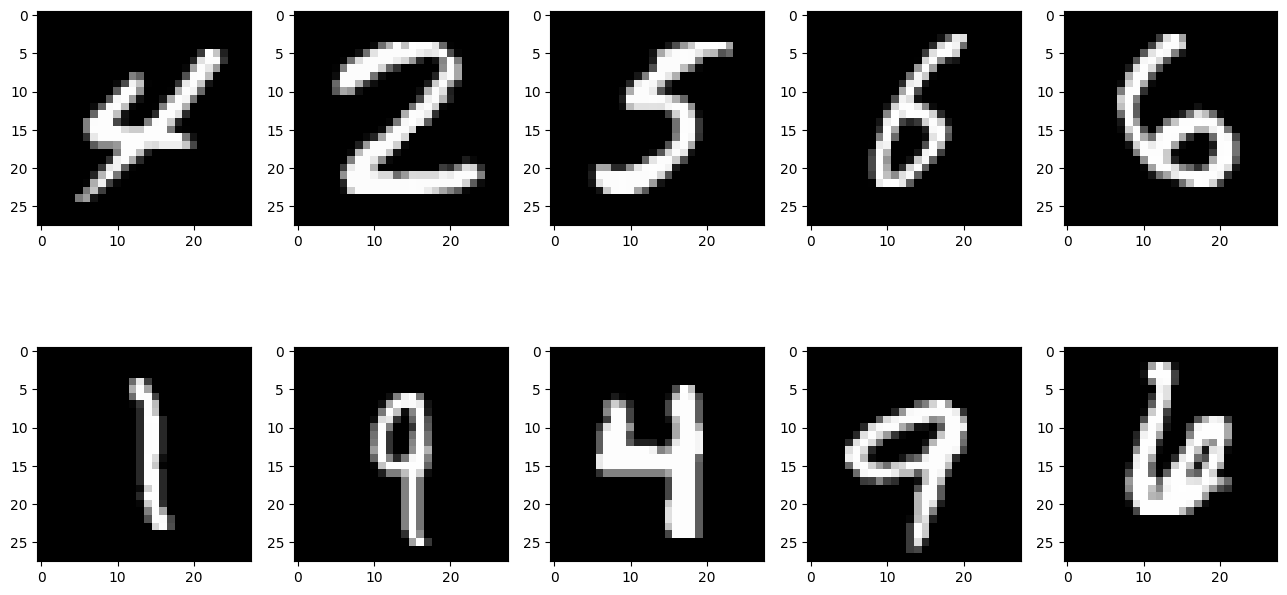

In [17]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [18]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [19]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [21]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8396 - loss: 0.5168
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9589 - loss: 0.1344
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9703 - loss: 0.0984
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9765 - loss: 0.0751
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9805 - loss: 0.0661
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9844 - loss: 0.0492
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0431
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9873 - loss: 0.0405
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0332
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0297


Plot the loss and accuracy graphs

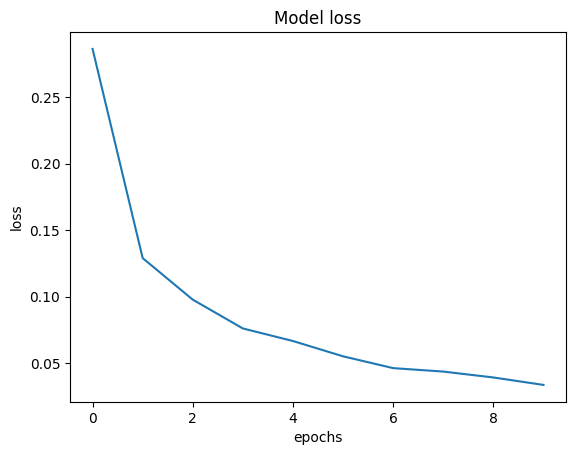

In [22]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

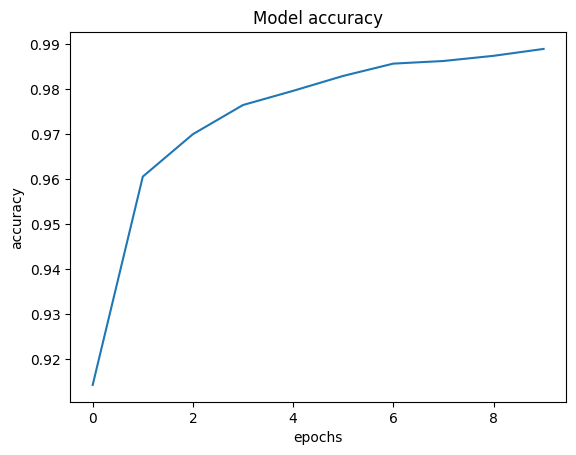

In [23]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [24]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.1055
Loss of the Test dataset is: 0.09558846801519394
Accuracy of the test dataset is: 0.9765999913215637


Save the model weights

In [25]:
model.save_weights("MNIST_WEIGHTS_V1.weights.h5")


In [27]:
# Hyperparameter variant: deeper/wider, dropout, and more epochs
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Rebuild a stronger baseline model
hp_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

hp_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

hp_info = hp_model.fit(new_train_data, new_train_target, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

hp_loss, hp_acc = hp_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f"Hyperparam baseline — Test accuracy: {hp_acc:.4f}")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8063 - loss: 0.6320 - val_accuracy: 0.9668 - val_loss: 0.1167
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9523 - loss: 0.1630 - val_accuracy: 0.9732 - val_loss: 0.0891
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9656 - loss: 0.1119 - val_accuracy: 0.9797 - val_loss: 0.0726
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9733 - loss: 0.0871 - val_accuracy: 0.9822 - val_loss: 0.0682
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9770 - loss: 0.0708 - val_accuracy: 0.9812 - val_loss: 0.0658
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9824 - loss: 0.0573 - val_accuracy: 0.9822 - val_loss: 0.0651
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9827 - loss: 0.0519 - val_accuracy: 0.9845 - val_loss: 0.0589
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9854 - loss: 0.0464 - val_accuracy: 0.

In [28]:
# L1 regularization model
l1_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1(1e-5)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(1e-5)),
    Dense(10, activation='softmax')
])

l1_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
l1_info = l1_model.fit(new_train_data, new_train_target, validation_split=0.1, epochs=8, batch_size=128, verbose=1)

l1_loss, l1_acc = l1_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f"L1 — Test accuracy: {l1_acc:.4f}")

# L2 regularization model
l2_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dense(10, activation='softmax')
])

l2_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
l2_info = l2_model.fit(new_train_data, new_train_target, validation_split=0.1, epochs=8, batch_size=128, verbose=1)

l2_loss, l2_acc = l2_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f"L2 — Test accuracy: {l2_acc:.4f}")

Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8118 - loss: 0.7134 - val_accuracy: 0.9552 - val_loss: 0.1913
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9514 - loss: 0.2007 - val_accuracy: 0.9660 - val_loss: 0.1502
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9656 - loss: 0.1504 - val_accuracy: 0.9752 - val_loss: 0.1268
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9751 - loss: 0.1207 - val_accuracy: 0.9762 - val_loss: 0.1249
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9802 - loss: 0.1048 - val_accuracy: 0.9740 - val_loss: 0.1338
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9836 - loss: 0.0927 - val_accuracy: 0.9768 - val_loss: 0.1216
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9874 - loss: 0.0811 - val_accuracy: 0.9745 - val_loss: 0.1309
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9898 - loss: 0.0743 - val_accuracy: 0.9802 - v

[[ 972    1    0    0    0    1    3    1    1    1]
 [   0 1123    3    2    0    0    2    0    5    0]
 [   4    1 1012    2    2    1    2    5    3    0]
 [   0    0    3  993    0    3    0    4    1    6]
 [   1    2    2    0  960    0    4    0    1   12]
 [   4    0    0    6    1  872    4    1    2    2]
 [   3    3    1    1    6    3  941    0    0    0]
 [   1    4   10    2    0    0    0 1003    1    7]
 [   4    1    3    2    2    1    1    2  952    6]
 [   2    2    0    3    7    2    0    5    1  987]]


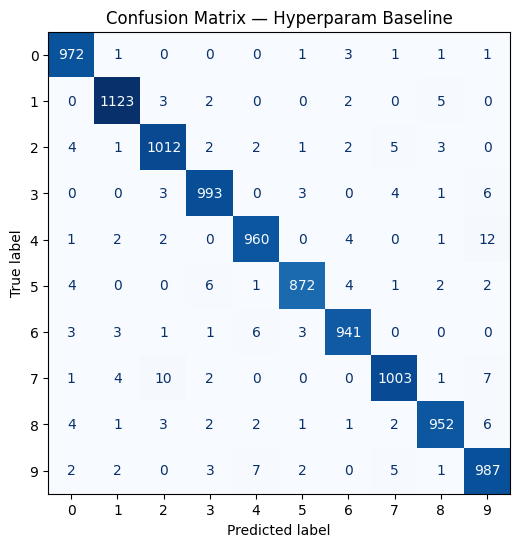

In [29]:
# Confusion matrix for the strongest model so far (choose hp_model here)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes on the test set
hp_pred = np.argmax(hp_model.predict(new_test_data, verbose=0), axis=1)
true = np.argmax(new_test_target, axis=1)

cm = confusion_matrix(true, hp_pred)
print(cm)

fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title('Confusion Matrix — Hyperparam Baseline')
plt.show()